## Eye data

In [ ]:
from util import fisherztrans,stat_m_e,pair_test,sig,color_inv_alpha
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from faceprf_figure_function import set_figure,set_ax,myviolinplot_ind,myviolinplot_pair,myviolinplot_multi
import pingouin

nsubj = 8
npos = 16
task = ['Digit Task','Face Task']
ntask = len(task)

data_path = "../data/"

### correlation

p:[0.9944, 0.9944, 0.9944, 0.9944, 0.9944, 0.2263, 0.9944, 0.9944]
p:[0.8394, 0.9854, 0.9889, 0.9854, 0.9889, 0.9889, 0.9281, 0.8394]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30744\3736850314.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('figS4-eye_correlation.pdf', bbox_inches='tight')
d:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
d:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


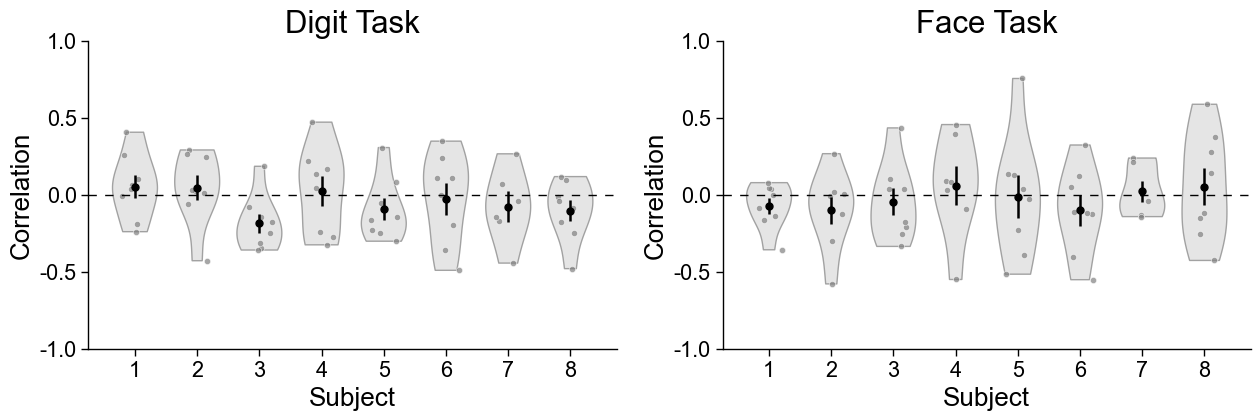

In [ ]:
all_corr = np.load(f'{data_path}/stim_eye_corr.npz',allow_pickle = True)['all_corr']
all_corr_fisherz = np.load(f'{data_path}/stim_eye_corr.npz',allow_pickle = True)['all_corr_fisherz']

# test
ps_all = np.ones([2,8])
for task_i in range(ntask):
    ps = [pingouin.ttest(all_corr_fisherz[:,task_i,s],0,paired = False)["p-val"].iloc[0] for s in range(8)]
    ps_all[task_i,:] = multipletests(ps)[1]
    print('p:{}'.format([round(p,4) for p in ps_all[task_i,:]]))    

# plot
set_figure()
fig,axes = plt.subplots(1,2,figsize=(15,4),gridspec_kw={'wspace': 0.2})
ylbls = 'Correlation'
ylims = [[-1,1,0.5],[-1,1,0.5]]
for task_i in range(ntask):
    ax = axes[task_i]
    data = all_corr[:,task_i,:].transpose(1,0)
    myviolinplot_multi(ax,all_corr[:,task_i,:].transpose(1,0),"mean",'sem',ps_all[task_i,:],[1])
    ax.set_ylabel(ylbls)
    ax.set_xlabel("Subject")
    ax.set_title(task[task_i])
    ax.set_yticks(np.arange(ylims[task_i][0],ylims[task_i][1]*1.01,ylims[task_i][2]))
    ax.set_ylim(ylims[task_i][:2])
    ax.axhline(y=0,color=np.array([1,1,1])*0,linestyle='--',linewidth=1,dashes=(6,6))
fig.savefig('figS7-eye_correlation.pdf', bbox_inches='tight')
